<a href="https://colab.research.google.com/github/novtryrezki/Terbaru/blob/main/1FFNN_bs_64_ep_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

In [2]:
# Melakukan mount pada Google Drive
drive.mount('/content/drive')

# Menentukan path file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Membuat objek zip_ref
zip_ref = zipfile.ZipFile(zip_path, 'r')

# Mengekstrak file ZIP
extract_path ='/content/images'
zip_ref.extractall(extract_path)

# Tutup objek zip_ref setelah selesai
zip_ref.close()

Mounted at /content/drive


In [3]:
# Mendefinisikan path direktori dataset
dataset_dir = os.path.join(extract_path, 'images')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
list_train = sorted(os.listdir(train_dir))
list_test = sorted(os.listdir(test_dir))

print("Daftar Angka pada Dataset Train yaitu : ", list_train)
print("Daftar Angka pada Dataset Test yaitu : ", list_test)

Daftar Angka pada Dataset Train yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']
Daftar Angka pada Dataset Test yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']


In [4]:
def count_images(directory):
    return sum(1 for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.gif')))

# Menghitung jumlah gambar di data train
train_image_count = sum(count_images(os.path.join(train_dir, angka)) for angka in list_train)

# Menghitung jumlah gambar di data test
test_image_count = sum(count_images(os.path.join(test_dir, angka)) for angka in list_test)

print(f"Jumlah gambar di Dataset Train: {train_image_count}")
print(f"Jumlah gambar di Dataset Test: {test_image_count}")

Jumlah gambar di Dataset Train: 1763
Jumlah gambar di Dataset Test: 445


# Preprocessing

In [5]:
import cv2

def resize_images(directory, target_resolution):
    for angka in os.listdir(directory):
        angka_dir = os.path.join(directory, angka)
        for file_name in os.listdir(angka_dir):
            file_path = os.path.join(angka_dir, file_name)
            img = cv2.imread(file_path)
            resized_img = cv2.resize(img, (target_resolution[0], target_resolution[1]))
            cv2.imwrite(file_path, resized_img)

target_resolution = (52, 78)
resize_images(train_dir, target_resolution)
resize_images(test_dir, target_resolution)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat generator data dengan augmentasi
image_size = (52, 78)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 1763 images belonging to 10 classes.
Found 445 images belonging to 10 classes.


# Membuat Model FFNN

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import math

img_size = 52*78*1

# Perhitungan jumlah neuron pada lapisan tersembunyi
hidden_neurons = 201

model1f = Sequential()
model1f.add(Flatten(input_shape=(52, 78, 1)))
model1f.add(Dense(hidden_neurons, activation='relu'))
model1f.add(Dense(10, activation='softmax'))

model1f.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Mendapatkan bobot dari model
weights = []
for layer in model1f.layers:
    weights.append(layer.get_weights())

print("Bobot dari model:")
for i, layer_weights in enumerate(weights):
    print("Layer", i+1)
    for j, w in enumerate(layer_weights):
        print("  Bobot {}: {}".format(j+1, w.shape))

Bobot dari model:
Layer 1
Layer 2
  Bobot 1: (4056, 201)
  Bobot 2: (201,)
Layer 3
  Bobot 1: (201, 10)
  Bobot 2: (10,)


In [9]:
model1f.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4056)              0         
                                                                 
 dense (Dense)               (None, 201)               815457    
                                                                 
 dense_1 (Dense)             (None, 10)                2020      
                                                                 
Total params: 817477 (3.12 MB)
Trainable params: 817477 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model1f.fit(train_generator, epochs=20, verbose = 1)

Epoch 1/20
28/28 [==============================] - 2s 64ms/step - loss: 2.0497 - accuracy: 0.3074
Epoch 2/20
28/28 [==============================] - 2s 76ms/step - loss: 1.9717 - accuracy: 0.3352
Epoch 3/20
28/28 [==============================] - 2s 65ms/step - loss: 1.9704 - accuracy: 0.3358
Epoch 4/20
28/28 [==============================] - 2s 66ms/step - loss: 1.8967 - accuracy: 0.3880
Epoch 5/20
28/28 [==============================] - 3s 112ms/step - loss: 1.8792 - accuracy: 0.3857
Epoch 6/20
28/28 [==============================] - 2s 66ms/step - loss: 1.8527 - accuracy: 0.3800
Epoch 7/20
28/28 [==============================] - 2s 68ms/step - loss: 1.8633 - accuracy: 0.3778
Epoch 8/20
28/28 [==============================] - 2s 65ms/step - loss: 1.8187 - accuracy: 0.3965
Epoch 9/20
28/28 [==============================] - 2s 83ms/step - loss: 1.8134 - accuracy: 0.3931
Epoch 10/20
28/28 [==============================] - 3s 90ms/step - loss: 1.7797 - accuracy: 0.3982
Epoch 11

In [11]:
# Loop melalui semua layer dalam model yang sudah dimuat
for layer in model1f.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        # Cetak informasi tentang bobot
        print(f"Layer Name: {layer.name}")
        print("Weight Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
        print("Weight Matrix:")
        print(weights[0])  # Bobot
        print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
        print("Bias Vector:")
        print(weights[1])    # Bias
        print("-----------------------------------")

Layer Name: dense
Weight Matrix Shape: (4056, 201)
Weight Matrix:
[[-0.00229944 -0.00902476  0.02897036 ... -0.02762796  0.0092498
   0.0344545 ]
 [ 0.02124282  0.03279325 -0.01500636 ... -0.02502996  0.01833769
  -0.00413303]
 [-0.02848809  0.00381529  0.03374629 ... -0.03367431 -0.01563998
   0.02112035]
 ...
 [-0.00037414  0.00770217 -0.03323672 ...  0.02453049 -0.0094608
   0.02623443]
 [ 0.00032146 -0.02272408  0.01427082 ... -0.02176348 -0.01939225
   0.03665442]
 [-0.00394235  0.00749774  0.03198717 ... -0.01556173  0.00105017
  -0.03745735]]
Bias Vector Shape: (201,)
Bias Vector:
[ 5.2316806e-05  0.0000000e+00 -6.1894643e-05 -6.7551463e-04
 -8.4774429e-03 -1.2321220e-04 -7.5178832e-04  3.1906311e-04
  2.9650901e-03  5.4939206e-05 -7.8151771e-04  3.5442520e-04
 -1.5020944e-04 -9.8450575e-04 -1.3277326e-03 -5.9599697e-05
 -4.8662441e-06 -9.8659890e-05  2.7348737e-05  0.0000000e+00
 -8.6115324e-04  3.6562811e-05  0.0000000e+00 -3.8646094e-03
  7.2807507e-03  2.3421683e-04  2.55224

In [12]:
# Inisialisasi dictionary untuk menyimpan bobot dan bias dari setiap layer
weights_biases = {}

# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model1f.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights, biases = layer.get_weights()
        # Simpan bobot dan bias dalam dictionary dengan menggunakan nama layer
        weights_biases[layer.name] = {'weights': weights, 'biases': biases}

# Contoh penggunaan:
hidden_layer_biases = weights_biases['dense']['biases']
output_layer_weights = weights_biases['dense_1']['weights']

# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer_name, params in weights_biases.items():
    # Cetak informasi tentang bobot dan bias
    print(f"Layer Name: {layer_name}")
    print("Weight Matrix Shape:", params['weights'].shape)  # Ukuran matriks bobot
    print("Weight Matrix:")
    print(params['weights'])  # Bobot
    print("Bias Vector Shape:", params['biases'].shape)    # Ukuran vektor bias
    print("Bias Vector:")
    print(params['biases'])    # Bias
    print("-----------------------------------")

Layer Name: dense
Weight Matrix Shape: (4056, 201)
Weight Matrix:
[[-0.00229944 -0.00902476  0.02897036 ... -0.02762796  0.0092498
   0.0344545 ]
 [ 0.02124282  0.03279325 -0.01500636 ... -0.02502996  0.01833769
  -0.00413303]
 [-0.02848809  0.00381529  0.03374629 ... -0.03367431 -0.01563998
   0.02112035]
 ...
 [-0.00037414  0.00770217 -0.03323672 ...  0.02453049 -0.0094608
   0.02623443]
 [ 0.00032146 -0.02272408  0.01427082 ... -0.02176348 -0.01939225
   0.03665442]
 [-0.00394235  0.00749774  0.03198717 ... -0.01556173  0.00105017
  -0.03745735]]
Bias Vector Shape: (201,)
Bias Vector:
[ 5.2316806e-05  0.0000000e+00 -6.1894643e-05 -6.7551463e-04
 -8.4774429e-03 -1.2321220e-04 -7.5178832e-04  3.1906311e-04
  2.9650901e-03  5.4939206e-05 -7.8151771e-04  3.5442520e-04
 -1.5020944e-04 -9.8450575e-04 -1.3277326e-03 -5.9599697e-05
 -4.8662441e-06 -9.8659890e-05  2.7348737e-05  0.0000000e+00
 -8.6115324e-04  3.6562811e-05  0.0000000e+00 -3.8646094e-03
  7.2807507e-03  2.3421683e-04  2.55224

In [14]:
from google.colab import files
import cv2

import numpy as np

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi softmax
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Fungsi forward pass manual
def manual_forward_pass(X, weights_biases):
    # Hidden layer input (Z1)
    hidden_layer_input = np.dot(X, weights_biases['dense']['weights']) + weights_biases['dense']['biases']
    # Hidden layer output (A1)
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Output layer input (Z2)
    output_layer_input = np.dot(hidden_layer_output, weights_biases['dense_1']['weights']) + weights_biases['dense_1']['biases']
    # Output layer output (A2)
    output_layer_output = softmax(output_layer_input)

    return hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output

# Fungsi untuk mengunggah gambar
uploaded = files.upload()

# Baca gambar yang diunggah
for fn in uploaded.keys():
    # Baca gambar menggunakan OpenCV
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)  # Ubah ke skala keabuan (grayscale) jika perlu
    # Lakukan pra-pemrosesan, seperti resize gambar ke ukuran yang sesuai dengan model Anda
    img_resized = cv2.resize(img, (78, 52))  # Sesuaikan ukuran dengan kebutuhan model Anda

# Ubah gambar menjadi array numpy dan lakukan normalisasi jika diperlukan
X_test_sample = np.array(img_resized).reshape(1, -1)
X_test_sample = X_test_sample / 255.0  # Normalisasi

# Lakukan feedforward untuk mendapatkan prediksi
hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output = manual_forward_pass(X_test_sample, weights_biases)

# Lakukan prediksi dengan mengambil kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(output_layer_output)

# Tampilkan prediksi
print("Predicted Class:", predicted_class)


Saving 20231206_091207.jpg to 20231206_091207 (1).jpg
Predicted Class: 0


In [16]:
print("Hidden Layer Input (Z1):")
print(hidden_layer_input)
print("\nHidden Layer Output (A1):")
print(hidden_layer_output)
print("\nOutput Layer Input (Z2):")
print(output_layer_input)
print("\nOutput Layer Output (A2):")
print(output_layer_output)

Hidden Layer Input (Z1):
[[-0.55060817 -1.78792356 -0.786281   -0.96595886  1.3534724  -0.69799415
  -0.60747579 -0.36036963  0.45776584 -0.23930506 -0.93248355  0.30559847
  -0.98999225 -1.17825458 -0.28258426 -1.17542325 -1.14018509 -0.05595145
  -1.09961636 -0.98998521 -0.11943772 -1.28224299 -2.07247466  0.86860901
   0.83948774 -0.36570224  0.34457008  0.18624659  0.56731531 -0.94692069
   1.29056323  0.17460486 -1.45487195 -0.64711115  0.96189004 -0.85591595
   0.3794297  -0.81716301  0.19524632 -0.88923554  0.01309267 -0.07618752
   0.01142221 -0.88183011 -0.65357385 -0.97835026  0.27488317 -0.27315675
  -0.25484968 -1.33468759 -0.96411562  0.9318358  -0.031085    1.17474712
   0.02510397  0.04673401 -0.11342471 -0.18711471 -0.11873392  0.89587871
  -0.36496028 -0.66201028  0.89134102 -0.60496369  0.66765358  0.13050061
  -0.01646712  0.92517725 -0.03660327  0.18680666  0.03041889  0.74546272
  -1.29623277 -0.14621333 -0.64071263 -0.64667386  0.63018505  1.49845364
  -1.19199693

In [15]:
output_layer_output

array([[0.23540339, 0.12300506, 0.08786765, 0.112222  , 0.06121761,
        0.09648443, 0.03129548, 0.06947104, 0.14006807, 0.04296528]])

In [17]:
import numpy as np

# Fungsi aktivasi ReLU
def relu(x):
    return np.maximum(0, x)

# Fungsi softmax
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Fungsi forward pass manual
def manual_forward_pass(X, weights_biases):
    # Hidden layer input (Z1)
    hidden_layer_input = np.dot(X, weights_biases['dense']['weights']) + weights_biases['dense']['biases']
    # Hidden layer output (A1) dengan ReLU activation
    hidden_layer_output = relu(hidden_layer_input)

    # Output layer input (Z2)
    output_layer_input = np.dot(hidden_layer_output, weights_biases['dense_1']['weights']) + weights_biases['dense_1']['biases']
    # Output layer output (A2)
    output_layer_output = softmax(output_layer_input)

    return hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output
# Fungsi untuk mengunggah gambar
uploaded = files.upload()

# Baca gambar yang diunggah
for fn in uploaded.keys():
    # Baca gambar menggunakan OpenCV
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)  # Ubah ke skala keabuan (grayscale) jika perlu
    # Lakukan pra-pemrosesan, seperti resize gambar ke ukuran yang sesuai dengan model Anda
    img_resized = cv2.resize(img, (78, 52))  # Sesuaikan ukuran dengan kebutuhan model Anda

# Ubah gambar menjadi array numpy dan lakukan normalisasi jika diperlukan
X_test_sample = np.array(img_resized).reshape(1, -1)
X_test_sample = X_test_sample / 255.0  # Normalisasi

# Lakukan feedforward untuk mendapatkan prediksi
hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output = manual_forward_pass(X_test_sample, weights_biases)

# Lakukan prediksi dengan mengambil kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(output_layer_output)

# Tampilkan prediksi
print("Predicted Class:", predicted_class)


Saving 20231206_091207.jpg to 20231206_091207 (2).jpg
Predicted Class: 0


In [18]:
print("Hidden Layer Input (Z1):")
print(hidden_layer_input)
print("\nHidden Layer Output (A1):")
print(hidden_layer_output)
print("\nOutput Layer Input (Z2):")
print(output_layer_input)
print("\nOutput Layer Output (A2):")
print(output_layer_output)

Hidden Layer Input (Z1):
[[-0.55060817 -1.78792356 -0.786281   -0.96595886  1.3534724  -0.69799415
  -0.60747579 -0.36036963  0.45776584 -0.23930506 -0.93248355  0.30559847
  -0.98999225 -1.17825458 -0.28258426 -1.17542325 -1.14018509 -0.05595145
  -1.09961636 -0.98998521 -0.11943772 -1.28224299 -2.07247466  0.86860901
   0.83948774 -0.36570224  0.34457008  0.18624659  0.56731531 -0.94692069
   1.29056323  0.17460486 -1.45487195 -0.64711115  0.96189004 -0.85591595
   0.3794297  -0.81716301  0.19524632 -0.88923554  0.01309267 -0.07618752
   0.01142221 -0.88183011 -0.65357385 -0.97835026  0.27488317 -0.27315675
  -0.25484968 -1.33468759 -0.96411562  0.9318358  -0.031085    1.17474712
   0.02510397  0.04673401 -0.11342471 -0.18711471 -0.11873392  0.89587871
  -0.36496028 -0.66201028  0.89134102 -0.60496369  0.66765358  0.13050061
  -0.01646712  0.92517725 -0.03660327  0.18680666  0.03041889  0.74546272
  -1.29623277 -0.14621333 -0.64071263 -0.64667386  0.63018505  1.49845364
  -1.19199693

#Matriks Konfusi

7/7 [==============================] - 0s 34ms/step


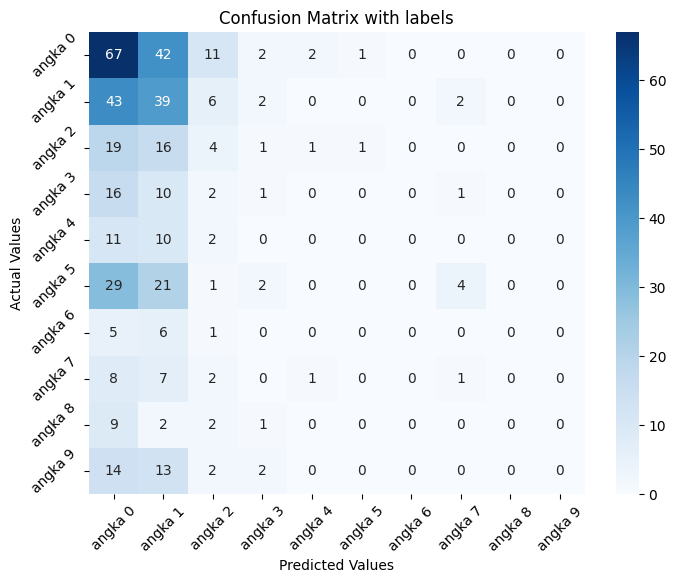

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan prediksi model dan label sebenarnya
def get_predictions_and_labels(model, data_generator):
    predictions = model.predict(data_generator)
    true_classes = data_generator.classes
    return predictions, true_classes

# Mendapatkan prediksi dan label sebenarnya untuk data uji
y_pred_prob, y_true = get_predictions_and_labels(model1f, test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Membuat matriks konfusi
cf_matrix = confusion_matrix(y_true, y_pred)

# Membuat visualisasi matriks konfusi
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)

# Menetapkan label dan judul
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

class_labels = list(test_generator.class_indices.keys())

# Menetapkan label pada sumbu x dan y sesuai dengan jenis kelas
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=45)

# Menampilkan visualisasi Matriks Konfusi
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.251685393258427
